In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])

In [9]:
models = [
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$',
    '$\\mathrm{\\textsc{LXMERT}}$',
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$',
    '$\\mathrm{\\textsc{VisualBERT}}$',
    '$\\mathrm{\\textsc{UNITER}_{BASE}}$'
]

# Fine-tuning

## RefCOCO+

In [443]:
vilbert = {0 : 71.41, 1234 : 71.04, 27 : 71.62, 33 : 71.31, 42 : 71.17, 54 : 71.00, 69 : 70.72, 73 : 71.211, 89 : 71.163, 93 : 70.63}
lxmert = {0 : 68.84, 1234 : 69.06, 27 : 69.23, 33 : 69.29, 42 : 69.52, 54 : 68.89, 69 : 69.22, 73 : 69.36, 89 : 69.35, 93 : 69.19}
vlbert = {0 : 71.07, 1234 : 70.99, 27 : 71.04, 33 : 70.80, 42 : 71.16, 54 : 71.28, 69 : 71.31, 73 : 71.24, 89 : 71.27, 93 : 70.82}
visualbert = {0 : 69.68, 1234 : 70.14, 27 : 69.66, 33 : 69.59, 42 : 69.46, 54 : 69.77, 69 : 69.48, 73 : 69.703, 89 : 69.449, 93 : 69.16}
uniter = {0 : 71.95, 1234 : 71.70, 27 : 71.99, 33 : 71.76, 42 : 71.97, 54 : 71.85, 69 : 71.97, 73 : 72.13, 89 : 71.72, 93 : 71.32}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,71.41,71.04,71.62,71.31,71.17,71.00,70.72,71.211,71.163,70.63
lxmert,68.84,69.06,69.23,69.29,69.52,68.89,69.22,69.360,69.350,69.19
vl-bert,71.07,70.99,71.04,70.80,71.16,71.28,71.31,71.240,71.270,70.82
visualbert,69.68,70.14,69.66,69.59,69.46,69.77,69.48,69.703,69.449,69.16
uniter,71.95,71.70,71.99,71.76,71.97,71.85,71.97,72.130,71.720,71.32


In [444]:
xs = df.index.to_list()*10
ys = [x[i] for i in range(10) for x in df.values]

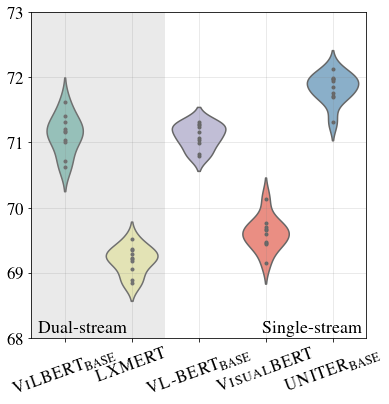

In [445]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(68, 73)

ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)
ax.text(-0.4, 68.1, 'Dual-stream', fontsize=18)
ax.text(2.95, 68.1, 'Single-stream', fontsize=18)

sns.violinplot(x=xs, y=ys, inner='point', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('refcoco_fine.pdf', bbox_inches='tight')

## NLVR2

In [420]:
vilbert = {0 : 72.38, 1234 : 72.66, 27 : 72.41, 33 : 72.43, 42 : 72.59, 54 : 72.24, 69 : 72.44, 73 : 72.66, 89 : 72.37, 93 : 72.96}
lxmert = {0 : 69.07, 1234 : 69.21, 27 : 68.58, 33 : 69.24, 42 : 69.74, 54 : 70.02, 69 : 69.97, 73 : 69.90, 89 : 69.50, 93 : 70.03}
vlbert = {0 : 72.61, 1234 : 73.25, 27 : 73.55, 33 : 73.12, 42 : 73.19, 54 : 73.06, 69 : 72.51, 73 : 73.04, 89 : 73.46, 93 : 72.92}
visualbert = {0 : 71.34, 1234 : 71.22, 27 : 70.71, 33 : 71.45, 42 : 71.84, 54 : 72.07, 69 : 71.75, 73 : 71.02, 89 : 71.24, 93 : 72.04}
uniter = {0 : 72.94, 1234 : 73.19, 27 : 73.32, 33 : 72.66, 42 : 73.29, 54 : 72.89, 69 : 72.97, 73 : 73.00, 89 : 72.90, 93 : 72.64}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,72.38,72.66,72.41,72.43,72.59,72.24,72.44,72.66,72.37,72.96
lxmert,69.07,69.21,68.58,69.24,69.74,70.02,69.97,69.90,69.50,70.03
vl-bert,72.61,73.25,73.55,73.12,73.19,73.06,72.51,73.04,73.46,72.92
visualbert,71.34,71.22,70.71,71.45,71.84,72.07,71.75,71.02,71.24,72.04
uniter,72.94,73.19,73.32,72.66,73.29,72.89,72.97,73.00,72.90,72.64


In [421]:
xs=df.index.to_list()*10
ys=[x[i] for i in range(10) for x in df.values]

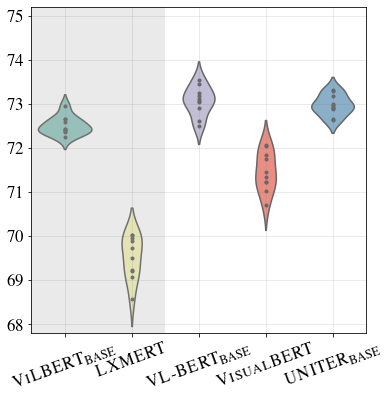

In [423]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(67.8, 75.2)
ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)

sns.violinplot(x=xs, y=ys, palette="Set3", inner='points', ax=ax)

ax.grid(color='gray', alpha=0.2)
ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)

plt.savefig('nlvr_fine.pdf', bbox_inches='tight')

# Pretraining

## VQA

In [424]:
vilbert = {0 : 68.90, 1234 : 68.71, 27 : 68.85, 33 : 68.97, 42 : 68.75, 54 : 68.83, 69 : 68.73, 73 : 68.77, 89 : 68.69, 93 : 68.90}
lxmert = {0 : 67.52, 1234 : 67.52, 27 : 67.73, 33 : 67.50, 42 : 67.08, 54 : 67.40, 69 : 67.66, 73 : 67.64, 89 : 67.46, 93 : 67.51}
vlbert = {0 : 68.04, 1234 : 68.16, 27 : 68.72, 33 : 68.29, 42 : 68.33, 54 : 68.37, 69 : 68.24, 73 : 67.97, 89 : 68.23, 93 : 67.96}
visualbert = {0 : 68.66, 1234 : 69.03, 27 : 68.65, 33 : 68.53, 42 : 68.20, 54 : 68.85, 69 : 68.77, 73 : 68.59, 89 : 68.55, 93 : 68.66}
uniter = {0 : 68.70, 1234 : 68.38, 27 : 68.92, 33 : 68.30, 42 : 68.84, 54 : 68.22, 69 : 68.14, 73 : 68.67, 89 : 68.80, 93 : 68.73}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,68.90,68.71,68.85,68.97,68.75,68.83,68.73,68.77,68.69,68.90
lxmert,67.52,67.52,67.73,67.50,67.08,67.40,67.66,67.64,67.46,67.51
vl-bert,68.04,68.16,68.72,68.29,68.33,68.37,68.24,67.97,68.23,67.96
visualbert,68.66,69.03,68.65,68.53,68.20,68.85,68.77,68.59,68.55,68.66
uniter,68.70,68.38,68.92,68.30,68.84,68.22,68.14,68.67,68.80,68.73


In [425]:
xs=df.index.to_list()*10
ys=[x[i] for i in range(10) for x in df.values]

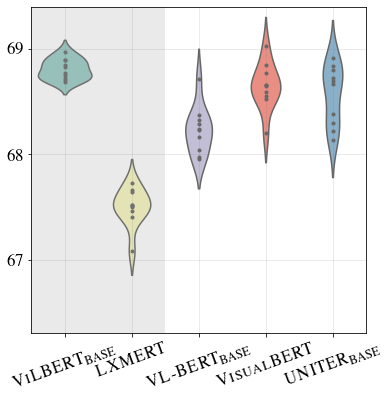

In [426]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)

sns.violinplot(x=xs, y=ys, inner='points', palette="Set3", ax=ax)

ax.set_ylim(66.3, 69.4)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticklabels(models, fontsize=14, rotation=0)

ax.grid(color='gray', alpha=0.2)
ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)

plt.savefig('vqa_pre.pdf', bbox_inches='tight')

## RefCOCO+

In [427]:
vilbert = {0 : 70.84, 1234 : 70.57, 27 : 70.95, 33 : 70.53, 42 : 71.41, 54 : 71.31, 69 : 70.87, 73 : 71.11, 89 : 71.07, 93 : 70.81}
lxmert = {0 : 70.49, 1234 : 70.40, 27 : 69.91, 33 : 70.14, 42 : 68.84, 54 : 69.81, 69 : 69.84, 73 : 70.20, 89 : 69.83, 93 : 70.04}
vlbert = {0 : 71.39, 1234 : 71.16, 27 : 71.46, 33 : 71.20, 42 : 71.07, 54 : 71.15, 69 : 70.84, 73 : 70.82, 89 : 71.23, 93 : 71.23}
visualbert = {0 : 69.67, 1234 : 70.02, 27 : 70.01, 33 : 69.51, 42 : 69.68, 54 : 69.83, 69 : 69.90, 73 : 70.25, 89 : 69.54, 93 : 69.40}
uniter = {0 : 71.62, 1234 : 71.88, 27 : 71.49, 33 : 71.61, 42 : 71.95, 54 : 71.59, 69 : 71.63, 73 : 71.45, 89 : 71.80, 93 : 71.50}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,70.84,70.57,70.95,70.53,71.41,71.31,70.87,71.11,71.07,70.81
lxmert,70.49,70.40,69.91,70.14,68.84,69.81,69.84,70.20,69.83,70.04
vl-bert,71.39,71.16,71.46,71.20,71.07,71.15,70.84,70.82,71.23,71.23
visualbert,69.67,70.02,70.01,69.51,69.68,69.83,69.90,70.25,69.54,69.40
uniter,71.62,71.88,71.49,71.61,71.95,71.59,71.63,71.45,71.80,71.50


In [428]:
xs=df.index.to_list()*10
ys=[x[i] for i in range(10) for x in df.values]

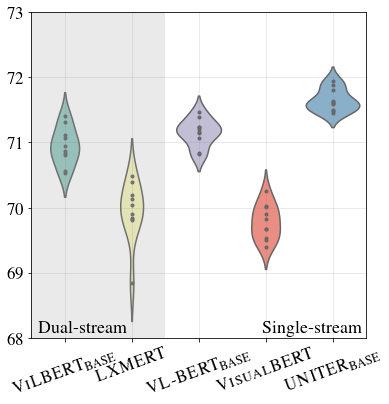

In [436]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(68, 73)

ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)
ax.text(-0.4, 68.1, 'Dual-stream', fontsize=18)
ax.text(2.95, 68.1, 'Single-stream', fontsize=18)

sns.violinplot(x=xs, y=ys, inner='points', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('refcoco_pre.pdf', bbox_inches='tight')

## NLVR2

In [437]:
vilbert = {0 : 71.87, 1234 : 71.91, 27 : 71.51, 33 : 72.24, 42 : 72.38, 54 : 72.57, 69 : 71.60, 73 : 71.93, 89 : 72.71, 93 : 71.72}
lxmert = {0 : 71.09, 1234 : 70.76, 27 : 68.87, 33 : 69.40, 42 : 69.07, 54 : 69.51, 69 : 69.69, 73 : 69.26, 89 : 69.64, 93 : 70.19}
vlbert = {0 : 72.31, 1234 : 72.57, 27 : 72.90, 33 : 73.19, 42 : 72.61, 54 : 73.20, 69 : 73.37, 73 : 73.04, 89 : 73.22, 93 : 72.66}
visualbert = {0 : 71.82, 1234 : 72.70, 27 : 72.61, 33 : 71.22, 42 : 71.34, 54 : 71.25, 69 : 72.03, 73 : 72.27, 89 : 72.87, 93 : 72.67}
uniter = {0 : 72.05, 1234 : 73.26, 27 : 73.36, 33 : 73.49, 42 : 72.94, 54 : 74.16, 69 : 72.57, 73 : 73.73, 89 : 73.30, 93 : 73.39}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], 
                  index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,71.87,71.91,71.51,72.24,72.38,72.57,71.60,71.93,72.71,71.72
lxmert,71.09,70.76,68.87,69.40,69.07,69.51,69.69,69.26,69.64,70.19
vl-bert,72.31,72.57,72.90,73.19,72.61,73.20,73.37,73.04,73.22,72.66
visualbert,71.82,72.70,72.61,71.22,71.34,71.25,72.03,72.27,72.87,72.67
uniter,72.05,73.26,73.36,73.49,72.94,74.16,72.57,73.73,73.30,73.39


In [438]:
xs=df.index.to_list()*10
ys=[x[i] for i in range(10) for x in df.values]

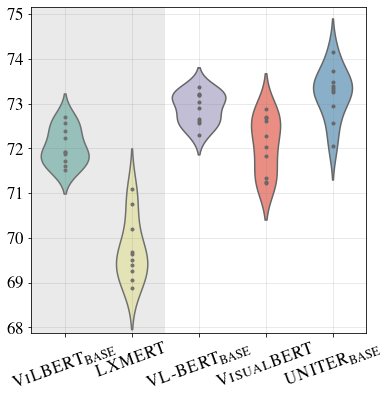

In [439]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(min(ys)-1, max(ys)+1.0)
ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)

sns.violinplot(x=xs, y=ys, inner='points', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('nlvr_pre.pdf', bbox_inches='tight')

## Flickr30k

In [440]:
vilbert_ir = {0 : 59.60, 1234 : 59.62, 27 : 60.94, 33 : 60.34, 42 : 59.82, 54 : 59.30, 69 : 61.24, 73 : 60.44, 89 : 60.78, 93 : 59.52}
vilbert_tr = {0 : 75.00, 1234 : 75.80, 27 : 76.90, 33 : 78.80, 42 : 76.70, 54 : 75.50, 69 : 77.30, 73 : 77.10, 89 : 76.50, 93 : 76.70}
lxmert_ir = {0 : 58.62, 1234 : 57.76, 27 : 55.36, 33 : 55.60, 42 : 50.36, 54 : 58.20, 69 : 55.92, 73 : 56.52, 89 : 56.64, 93 : 57.84}
lxmert_tr = {0 : 74.90, 1234 : 72.90, 27 : 71.30, 33 : 71.60, 42 : 62.50, 54 : 73.70, 69 : 70.10, 73 : 72.30, 89 : 72.20, 93 : 73.50}
vlbert_ir = {0 : 54.72, 1234 : 54.40, 27 : 57.26, 33 : 56.76, 42 : 57.92, 54 : 56.94, 69 : 55.14, 73 : 56.68, 89 : 57.62, 93 : 56.12}
vlbert_tr = {0 : 67.50, 1234 : 69.20, 27 : 70.80, 33 : 70.40, 42 : 68.50, 54 : 69.80, 69 : 71.30, 73 : 71.00, 89 : 70.90, 93 : 70.70}
visualbert_ir = {0 : 58.04, 1234 : 61.48, 27 : 58.98, 33 : 57.06, 42 : 61.06, 54 : 58.32, 69 : 58.90, 73 : 60.68, 89 : 58.16, 93 : 54.06}
visualbert_tr = {0 : 74.80, 1234 : 75.20, 27 : 71.50, 33 : 72.50, 42 : 75.50, 54 : 74.00, 69 : 72.80, 73 : 75.60, 89 : 71.30, 93 : 68.50}
uniter_ir = {0 : 60.74, 1234 : 58.26, 27 : 59.10, 33 : 58.72, 42 : 60.92, 54 : 57.88, 69 : 57.76, 73 : 60.54, 89 : 59.68, 93 : 59.94}
uniter_tr = {0 : 75.30, 1234 : 72.50, 27 : 73.20, 33 : 72.10, 42 : 74.20, 54 : 72.60, 69 : 72.90, 73 : 76.40, 89 : 73.50, 93 : 74.90}

df = pd.DataFrame()
df['type'] = (['IR']*10 + ['TR']*10)*5
df['model'] = ['vilbert']*10*2 + ['lxmert']*10*2 + ['vl-bert']*10*2 + ['visualbert']*10*2 + ['uniter']*10*2
df['values'] = list(vilbert_ir.values()) + list(vilbert_tr.values()) + list(lxmert_ir.values()) + list(lxmert_tr.values()) + \
               list(vlbert_ir.values()) + list(vlbert_tr.values()) + list(visualbert_ir.values()) + list(visualbert_tr.values()) + \
               list(uniter_ir.values()) + list(uniter_tr.values())

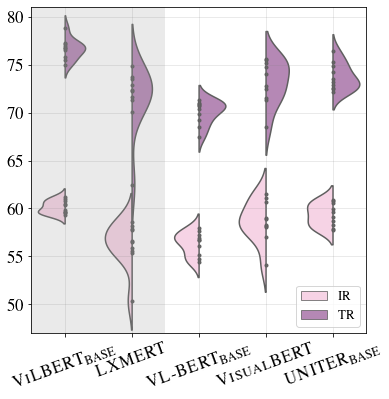

In [442]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(47, 81)
ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)

cm = plt.get_cmap('Set3') 
colors = cm.colors

sns.violinplot(x="model", y="values", hue="type", data=df, palette=[colors[7], colors[9]], split=True, inner='points', ax=ax)

ax.legend(loc='lower right', fontsize=13)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.set_ylabel("", fontsize=16)
ax.set_xlabel("", fontsize=16)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('retrieval_pre.pdf', bbox_inches='tight')

# Swapped Embeddings

In [54]:
model = []
dsets = []
values = []

# VQA
vilbert = {0 : 68.90, 1234 : 68.71, 27 : 68.85, 33 : 68.97, 42 : 68.75, 54 : 68.83, 69 : 68.73, 73 : 68.77, 89 : 68.69, 93 : 68.90}
uniter = {0 : 68.70, 1234 : 68.38, 27 : 68.92, 33 : 68.30, 42 : 68.84, 54 : 68.22, 69 : 68.14, 73 : 68.67, 89 : 68.80, 93 : 68.73}
embeds_vqa = [68.73, 68.73]

model += ['$\\mathrm{\\textsc{ViLBERT}_{BASE}}$']*10 + ['$\\mathrm{\\textsc{UNITER}_{BASE}}$']*10
dsets += ['VQAv2']*20
values += list(vilbert.values()) + list(uniter.values())

# RefCOCO
vilbert = {0 : 70.84, 1234 : 70.57, 27 : 70.95, 33 : 70.53, 42 : 71.41, 54 : 71.31, 69 : 70.87, 73 : 71.11, 89 : 71.07, 93 : 70.81}
uniter = {0 : 71.62, 1234 : 71.88, 27 : 71.49, 33 : 71.61, 42 : 71.95, 54 : 71.59, 69 : 71.63, 73 : 71.45, 89 : 71.80, 93 : 71.50}
embeds_ref = [70.97, 70.83]

model += ['$\\mathrm{\\textsc{ViLBERT}_{BASE}}$']*10 + ['$\\mathrm{\\textsc{UNITER}_{BASE}}$']*10
dsets += ['RefCOCO+']*20
values += list(vilbert.values()) + list(uniter.values())


# NLVR
vilbert = {0 : 71.87, 1234 : 71.91, 27 : 71.51, 33 : 72.24, 42 : 72.38, 54 : 72.57, 69 : 71.60, 73 : 71.93, 89 : 72.71, 93 : 71.72}
uniter = {0 : 72.05, 1234 : 73.26, 27 : 73.36, 33 : 73.49, 42 : 72.94, 54 : 74.16, 69 : 72.57, 73 : 73.73, 89 : 73.30, 93 : 73.39}
embeds_nlvr = [72.15, 72.61]

model += ['$\\mathrm{\\textsc{ViLBERT}_{BASE}}$']*10 + ['$\\mathrm{\\textsc{UNITER}_{BASE}}$']*10
dsets += ['NLVR2']*20
values += list(vilbert.values()) + list(uniter.values())

# Flickr IR
vilbert = {0 : 59.60, 1234 : 59.62, 27 : 60.94, 33 : 60.34, 42 : 59.82, 54 : 59.30, 69 : 61.24, 73 : 60.44, 89 : 60.78, 93 : 59.52}
uniter = {0 : 60.74, 1234 : 58.26, 27 : 59.10, 33 : 58.72, 42 : 60.92, 54 : 57.88, 69 : 57.76, 73 : 60.54, 89 : 59.68, 93 : 59.94}
embeds_ir = [58.68, 56.46]

model += ['$\\mathrm{\\textsc{ViLBERT}_{BASE}}$']*10 + ['$\\mathrm{\\textsc{UNITER}_{BASE}}$']*10
dsets += ['Flickr30k IR']*20
values += list(vilbert.values()) + list(uniter.values())

# Flickr TR
vilbert = {0 : 75.00, 1234 : 75.80, 27 : 76.90, 33 : 78.80, 42 : 76.70, 54 : 75.50, 69 : 77.30, 73 : 77.10, 89 : 76.50, 93 : 76.70}
uniter = {0 : 75.30, 1234 : 72.50, 27 : 73.20, 33 : 72.10, 42 : 74.20, 54 : 72.60, 69 : 72.90, 73 : 76.40, 89 : 73.50, 93 : 74.90}
embeds_tr = [74.30, 69.90]

model += ['$\\mathrm{\\textsc{ViLBERT}_{BASE}}$']*10 + ['$\\mathrm{\\textsc{UNITER}_{BASE}}$']*10
dsets += ['Flickr30k TR']*20
values += list(vilbert.values()) + list(uniter.values())

# Create dataframe
df = pd.DataFrame()
df['model'] = model
df['dset'] = dsets
df['values'] = values

print(df.shape)
df.head()

(100, 3)


,model,dset,values
0,$\mathrm{\textsc{ViLBERT}_{BASE}}$,VQAv2,68.90
1,$\mathrm{\textsc{ViLBERT}_{BASE}}$,VQAv2,68.71
2,$\mathrm{\textsc{ViLBERT}_{BASE}}$,VQAv2,68.85
3,$\mathrm{\textsc{ViLBERT}_{BASE}}$,VQAv2,68.97
4,$\mathrm{\textsc{ViLBERT}_{BASE}}$,VQAv2,68.75


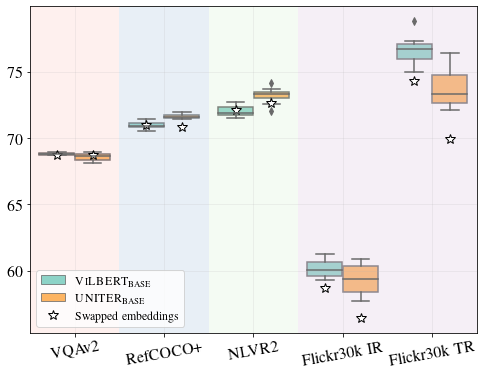

In [75]:
f, ax = plt.subplots(figsize=(8,6))

cm = plt.get_cmap('Set3') 
colors = cm.colors
bcm = plt.get_cmap('Pastel1')
bcolors = bcm.colors

ax.set_xlim(-0.5, 4.5)
ax.axvspan(-0.5, .5, facecolor=bcolors[0], alpha=0.2)
ax.axvspan(.5, 1.5, facecolor=bcolors[1], alpha=0.3)
ax.axvspan(1.5, 2.5, facecolor=bcolors[2], alpha=0.2)
ax.axvspan(2.5, 4.5, facecolor=bcolors[3], alpha=0.3)

ax = sns.boxplot(x="dset", y="values", hue="model", data=df, palette=[colors[0], colors[5]], saturation=1., ax=ax)

ix = 0
ax.plot(ix-0.2, embeds_vqa[0], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ax.plot(ix+0.2, embeds_vqa[1], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ix = 1
ax.plot(ix-0.2, embeds_ref[0], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ax.plot(ix+0.2, embeds_ref[1], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ix = 2
ax.plot(ix-0.2, embeds_nlvr[0], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ax.plot(ix+0.2, embeds_nlvr[1], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ix = 3
ax.plot(ix-0.2, embeds_ir[0], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ax.plot(ix+0.2, embeds_ir[1], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ix = 4
ax.plot(ix-0.2, embeds_tr[0], mfc="w", mec="k", marker='*', linestyle='', markersize=10)
ax.plot(ix+0.2, embeds_tr[1], mfc="w", mec="k", marker='*', linestyle='', markersize=10)

ax.set_ylabel("", fontsize=16)
ax.set_xlabel("", fontsize=16)
ax.tick_params(axis="both", labelsize=16, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.grid(alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
patch = Line2D([0], [0], marker='*', mfc='w', mec="k", label='Swapped embeddings', linestyle='', markersize=10)
handles.append(patch) 

# plot the legend
ax.legend(handles=handles, loc='lower left', fontsize=12)

plt.savefig('swapped2.pdf', bbox_inches='tight')

# NLVR2 Contrast Set

## Pretraining

In [48]:
vilbert = {0 : 55.94, 1234 : 54.43, 27 : 59.16, 33 : 54.63, 42 : 54.23, 54 : 57.04, 69 : 58.15, 73 : 61.67, 89 : 55.94, 93 : 54.93}
lxmert = {0 : 60.16, 1234 : 60.46, 27 : 55.23, 33 : 54.53, 42 : 52.92, 54 : 55.33, 69 : 56.34, 73 : 56.84, 89 : 57.45, 93 : 53.42}
vlbert = {0 : 51.61, 1234 : 52.11, 27 : 51.91, 33 : 53.62, 42 : 47.89, 54 : 51.81, 69 : 51.71, 73 : 51.91, 89 : 50.91, 93 : 56.34}
visualbert = {0 : 51.01, 1234 : 51.31, 27 : 51.71, 33 : 58.95, 42 : 53.42, 54 : 50.50, 69 : 52.31, 73 : 54.93, 89 : 50.70, 93 : 48.59}
uniter = {0 : 51.81, 1234 : 59.86, 27 : 60.26, 33 : 50.60, 42 : 58.55, 54 : 61.67, 69 : 61.37, 73 : 58.55, 89 : 51.21, 93 : 57.45}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,55.94,54.43,59.16,54.63,54.23,57.04,58.15,61.67,55.94,54.93
lxmert,60.16,60.46,55.23,54.53,52.92,55.33,56.34,56.84,57.45,53.42
vl-bert,51.61,52.11,51.91,53.62,47.89,51.81,51.71,51.91,50.91,56.34
visualbert,51.01,51.31,51.71,58.95,53.42,50.50,52.31,54.93,50.70,48.59
uniter,51.81,59.86,60.26,50.60,58.55,61.67,61.37,58.55,51.21,57.45


In [49]:
xs=df.index.to_list()*10
ys=[x[i] for i in range(10) for x in df.values]

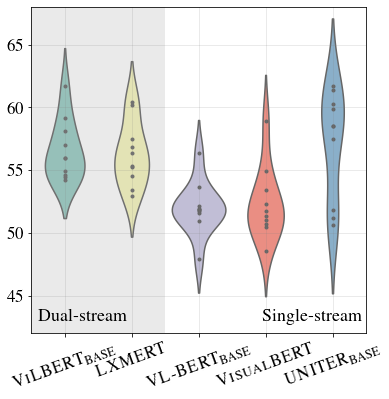

In [50]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(42, 68.0)
ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)
ax.text(-0.4, 43, 'Dual-stream', fontsize=18)
ax.text(2.95, 43, 'Single-stream', fontsize=18)

sns.violinplot(x=xs, y=ys, inner='points', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('contrast_pre.pdf', bbox_inches='tight')

## Fine-tuning

In [44]:
vilbert = {0 : 54.23, 1234 : 52.72, 27 : 52.01, 33 : 54.02, 42 : 55.84, 54 : 55.94, 69 : 51.21, 73 : 55.43, 89 : 54.13, 93 : 53.52}
lxmert = {0 : 52.92, 1234 : 57.04, 27 : 58.85, 33 : 56.14, 42 : 62.27, 54 : 60.46, 69 : 56.54, 73 : 54.23, 89 : 57.85, 93 : 56.74}
vlbert = {0 : 47.89, 1234 : 61.27, 27 : 52.72, 33 : 57.75, 42 : 53.62, 54 : 57.65, 69 : 58.75, 73 : 51.51, 89 : 58.55, 93 : 50.20}
visualbert = {0 : 53.42, 1234 : 53.82, 27 : 49.30, 33 : 53.82, 42 : 56.54, 54 : 57.65, 69 : 59.05, 73 : 53.02, 89 : 49.40, 93 : 53.12}
uniter = {0 : 58.55, 1234 : 61.57, 27 : 55.73, 33 : 54.43, 42 : 51.01, 54 : 60.26, 69 : 52.01, 73 : 55.73, 89 : 53.82, 93 : 55.23}

df = pd.DataFrame(data=[vilbert, lxmert, vlbert, visualbert, uniter], index=['vilbert', 'lxmert', 'vl-bert', 'visualbert', 'uniter'])
df

,0,1234,27,33,42,54,69,73,89,93
vilbert,54.23,52.72,52.01,54.02,55.84,55.94,51.21,55.43,54.13,53.52
lxmert,52.92,57.04,58.85,56.14,62.27,60.46,56.54,54.23,57.85,56.74
vl-bert,47.89,61.27,52.72,57.75,53.62,57.65,58.75,51.51,58.55,50.20
visualbert,53.42,53.82,49.30,53.82,56.54,57.65,59.05,53.02,49.40,53.12
uniter,58.55,61.57,55.73,54.43,51.01,60.26,52.01,55.73,53.82,55.23


In [45]:
xs=df.index.to_list()*10
ys=[x[i] for i in range(10) for x in df.values]

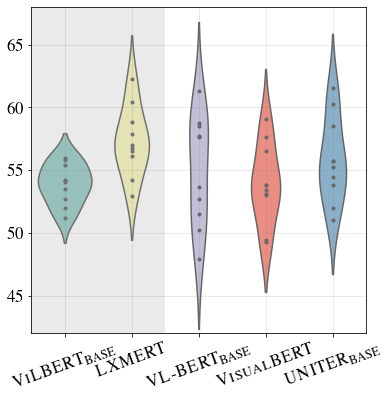

In [47]:
f, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(42, 68.0)
ax.axvspan(-0.5, 1.5, facecolor='#999999', alpha=0.2)

sns.violinplot(x=xs, y=ys, inner='points', palette="Set3", ax=ax)

ax.set_xticklabels(models, fontsize=17, rotation=20)
ax.tick_params(axis="y", labelsize=17)
ax.grid(color='gray', alpha=0.2)

plt.savefig('contrast_fine.pdf', bbox_inches='tight')